# **Registros de acidentes no Brasil**

Instalação da biblioteca Geopandas

In [ ]:
!pip install geopandas==0.10.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 6.3 MB 42.6 MB/s 
     |████████████████████████████████| 16.7 MB 50.6 MB/s 


In [ ]:
!pip install --upgrade pyshp
!pip install shapely==1.7.0
!pip install --upgrade descartes
!pip install mapclassify==2.3.0 libpysal==4.3.0 splot==1.1.3
!pip install esda
!pip install pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.2
    Uninstalling Shapely-1.8.2:
      Successfully uninstalled Shapely-1.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 8.7 MB/s 
 

In [ ]:
!pip install matplotlib==3.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.4 MB 4.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# **Bibliotecas**

In [ ]:
#Bibliotecas 
import shapely
import scipy 
import stat
import pandas as pd
import numpy as np #Matrizes e Arreys
import matplotlib.pyplot as plt #Analise visual
import seaborn as sns 

#modelo KNN
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions


#Analise espaciais
import geopandas as gpd
import pysal as ps
import splot
import mapclassify as mc
from libpysal import weights
from esda import Moran, Moran_Local, G_Local
from splot.esda import plot_moran, moran_scatterplot, lisa_cluster, plot_local_autocorrelation

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# **Analise simples no dataset**

> Bloco com recuo



In [ ]:
# Dataset baixado no site https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos
#Importando arquivo csv no caderno
df = pd.read_csv('drive/MyDrive/dados/datatran2020.csv', encoding="ISO-8859-1", delimiter=';')
#Para dados geometricos
geoDF = pd.read_csv('drive/MyDrive/dados/datatran2020.csv', encoding="ISO-8859-1", delimiter=';')
df

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Não,5,0,0,5,0,0,5,1,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
1,260036.0,2020-01-01,quarta-feira,01:00:00,RJ,116.0,178,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,2,1,0,0,1,0,0,1,"-22,75223028","-43,4379103",SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,2020-01-01,quarta-feira,01:52:00,SC,101.0,"206,9",SAO JOSE,Ingestão de Álcool,Colisão lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,"-27,59193546","-48,61824557",SR-SC,DEL8/1,UOP01/SC
3,260038.0,2020-01-01,quarta-feira,01:15:00,RO,364.0,236,CACOAL,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Sim,1,0,0,1,0,0,1,1,"-11,44624577","-61,43761218",SR-RO,DEL21/2,UOP02/RO
4,260039.0,2020-01-01,quarta-feira,01:30:00,PR,153.0,360,REBOUCAS,Ingestão de Álcool,Capotamento,Com Vítimas Feridas,Plena Noite,Crescente,Garoa/Chuvisco,Simples,Curva,Não,6,0,2,4,0,0,6,1,"-25,67503796","-50,75089805",SR-PR,DEL7/3,UOP04/PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63442,334713.0,2020-12-23,quarta-feira,13:58:00,PA,316.0,62,CASTANHAL,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Não,3,0,1,0,2,0,1,2,"-1,29786885","-47,93764104",SR-PA,UOP01,DEL01
63443,334777.0,2020-12-19,sábado,23:00:00,PA,316.0,106,SANTA MARIA DO PARA,Desobediência às normas de trânsito pelo condutor,Colisão frontal,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Sim,2,0,1,0,1,0,1,2,"-1,34101996","-47,55122901",SR-PA,UOP02,DEL01
63444,334780.0,2020-12-08,terça-feira,06:10:00,PR,116.0,"90,9",PIRAQUARA,Condutor Dormindo,Colisão traseira,Com Vítimas Feridas,Amanhecer,Crescente,Céu Claro,Múltipla,Reta,Não,3,0,2,0,1,0,2,2,"-25,4611174","-49,08880123",SR-PR,UOP01,DEL01
63445,334788.0,2020-12-31,quinta-feira,22:30:00,SC,101.0,"146,9",ITAPEMA,Avarias e/ou desgaste excessivo no pneu,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Crescente,Garoa/Chuvisco,Dupla,Curva,Sim,1,1,0,0,0,0,0,1,"-27,09129094","-48,61669064",SR-SC,UOP03,DEL04


# **Usando o Geopandas para plotar o mapa do País**

Utilizamos o método geopandas.read_file() para ler o .shp e geopandas.GeoDataFrame.shape para ver a quantidade de linhas e colunas. Bem similar ao Pandas.

In [ ]:
Brasil = gpd.read_file('BR.zip') 
Brasil.shape

(27, 5)

In [ ]:
#Area do Brasil coletada dos arquivos 
Brasil

,CD_UF,NM_UF,SIGLA,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982..."
1,12,Acre,AC,Norte,"POLYGON ((-73.16550 -7.34166, -73.05480 -7.381..."
2,13,Amazonas,AM,Norte,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."
3,14,Roraima,RR,Norte,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-46.43676 -1.01905, -46.43723 ..."
5,16,Amapá,AP,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
6,17,Tocantins,TO,Norte,"POLYGON ((-48.35878 -5.17008, -48.35617 -5.171..."
7,21,Maranhão,MA,Nordeste,"MULTIPOLYGON (((-44.66115 -2.98018, -44.66157 ..."
8,22,Piauí,PI,Nordeste,"POLYGON ((-41.78076 -2.76078, -41.77935 -2.764..."
9,23,Ceará,CE,Nordeste,"POLYGON ((-40.49582 -2.78541, -40.49242 -2.787..."


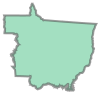

In [ ]:
#Demonstração de como o mapa será plotado
Brasil['geometry'][24]

Ao atribuir um CRS com o método geopandas.GeoDataFrame.crs e depois inspecioná-lo. É necessário utilizar o CRS WGS 84, que possuí o código EPSG 4326. Podemos procurar os padrões disponíveis nos sites abaixo:

* https://epsg.io/map#srs=4326&x=-47.751388&y=-15.690806&z=9&layer=streets



In [ ]:
Brasil.crs = ('epsg:4326')
Brasil.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Agora, vamos fazer nosso primeiro mapa com o método geopandas.GeoDataFrame.plot() . E de cara, vamos definir seus tamanhos com o comando figsize

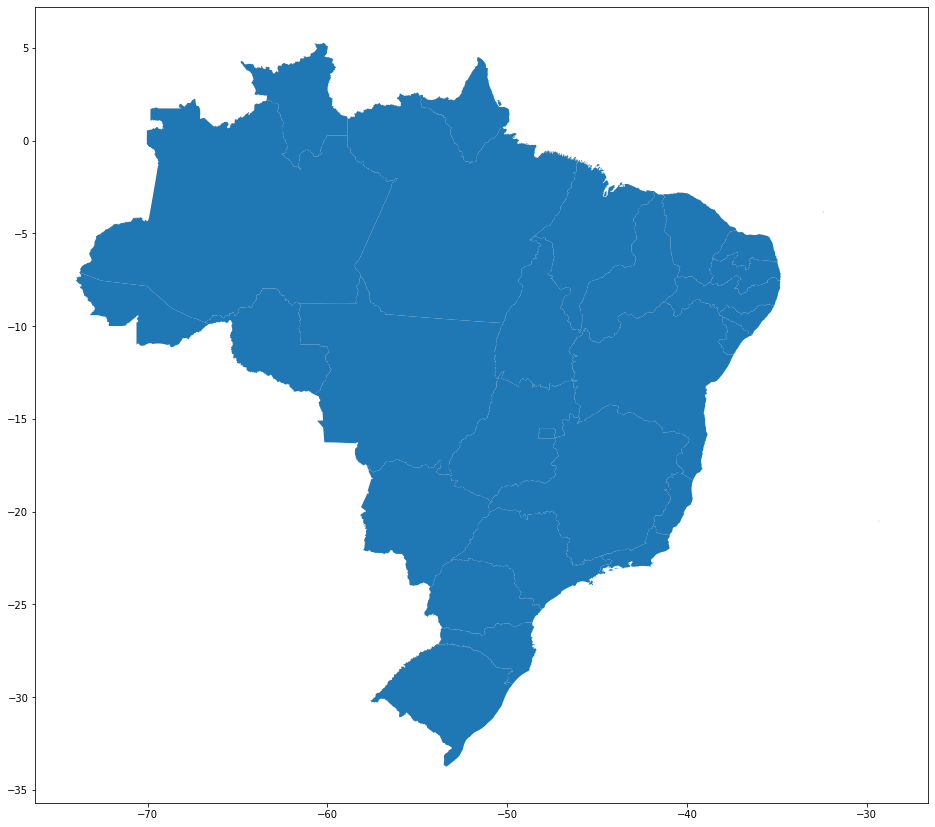

In [ ]:
#Tamanho do mapa do Brasil
Brasil.plot(figsize=(16,16))

Mapa do Brasil plotado com todos os 27 Estados

# **Convertendo dados em GeoDataFrame**

Covertendo dados do Dataset para GeoDataFrame através de seu par de coordenadas com geopandas.GeoDataFrame() .

Utilizamos geopandas.points_from_xy()para transformar Longitude e Latitude em uma lista de objetos shapely . E assim configurá-la como uma geometria ao criar o GeoDataFrame .

Primeiro temos que analisar os tipos de dados dentro do dataframe

In [ ]:
geoDF.dtypes

id                        float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
latitude                   object
longitude                  object
regional                   object
delegacia                  object
uop           

Como podemos observar, os dados Longitude e Latitude estão em object, será necessária uma conversão

In [ ]:
#Convertendo dados Longitude e Latitude e CD
geoDF['longitude'].str.replace(',', '.')
geoDF['longitude'] = geoDF['longitude'].str.replace(',', '.')
geoDF['longitude'] = geoDF['longitude'].astype('float')

geoDF['latitude'].str.replace(',', '.')
geoDF['latitude'] = geoDF['latitude'].str.replace(',', '.')
geoDF['latitude'] = geoDF['latitude'].astype('float')

In [ ]:
geoDF['latitude'].dtypes

dtype('float64')

In [ ]:
geoDF['longitude'].dtypes

dtype('float64')

In [ ]:
#Usando dados do dataset longitude e latitude
geo_BR_accidents = gpd.GeoDataFrame(geoDF, geometry=gpd.points_from_xy(geoDF.longitude, geoDF.latitude))
geo_BR_accidents.crs = ('epsg:4326')
geo_BR_accidents.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,geometry
0,260031.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,...,0,0,5,1,-11.774602,-49.107450,SR-TO,UOP01/TO,NaN,POINT (-49.10745 -11.77460)
1,260036.0,2020-01-01,quarta-feira,01:00:00,RJ,116.0,178,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,...,1,0,0,1,-22.752230,-43.437910,SR-RJ,DEL5/1,UOP02/RJ,POINT (-43.43791 -22.75223)
2,260037.0,2020-01-01,quarta-feira,01:52:00,SC,101.0,"206,9",SAO JOSE,Ingestão de Álcool,Colisão lateral,...,1,0,1,2,-27.591935,-48.618246,SR-SC,DEL8/1,UOP01/SC,POINT (-48.61825 -27.59194)
3,260038.0,2020-01-01,quarta-feira,01:15:00,RO,364.0,236,CACOAL,Velocidade Incompatível,Saída de leito carroçável,...,0,0,1,1,-11.446246,-61.437612,SR-RO,DEL21/2,UOP02/RO,POINT (-61.43761 -11.44625)
4,260039.0,2020-01-01,quarta-feira,01:30:00,PR,153.0,360,REBOUCAS,Ingestão de Álcool,Capotamento,...,0,0,6,1,-25.675038,-50.750898,SR-PR,DEL7/3,UOP04/PR,POINT (-50.75090 -25.67504)


No final do dataset, há uma coluna contendo a geometria de cada acidente, definida por pares de coordenadas (x, y) que formam pontos.

E o CRS que definimos para cada acidente, é similar ao do shapefile dos estados que importamos

In [ ]:
geo_BR_accidents.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# **Realizando a Plotagem de dados no mapa**

In [ ]:
#Verificando o total de colunas e linhas
geo_BR_accidents.shape

(63447, 31)

63447 é a quantidade de **acidentes** ser verificado no mapa

In [ ]:
geo_BR_accidents.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'geometry'],
      dtype='object')

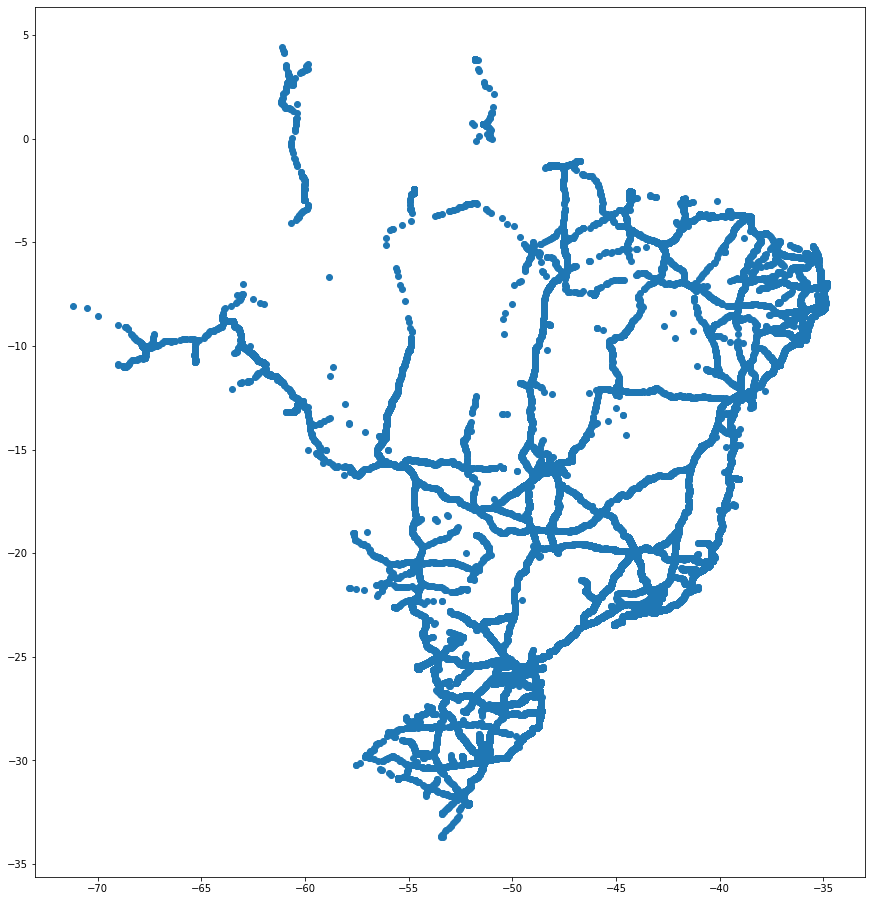

In [ ]:
#Pontos geometricos dos acidentes que aconteceu no Brasil ao longo do ano
geo_BR_accidents.sample(63447).plot(aspect=1, figsize=(16,16));

Agora, vamos plotar sobrepor as camadas do mapa com os limites dos estados com o mapa de acidentes em geo_BR_accidentes. 

In [ ]:
geo_BR_accidents_sample = geo_BR_accidents.sample(63447)

Agora, vamos plotar os acidentes de acordo com seu nível de severidade, que está na coluna feridos_graves .

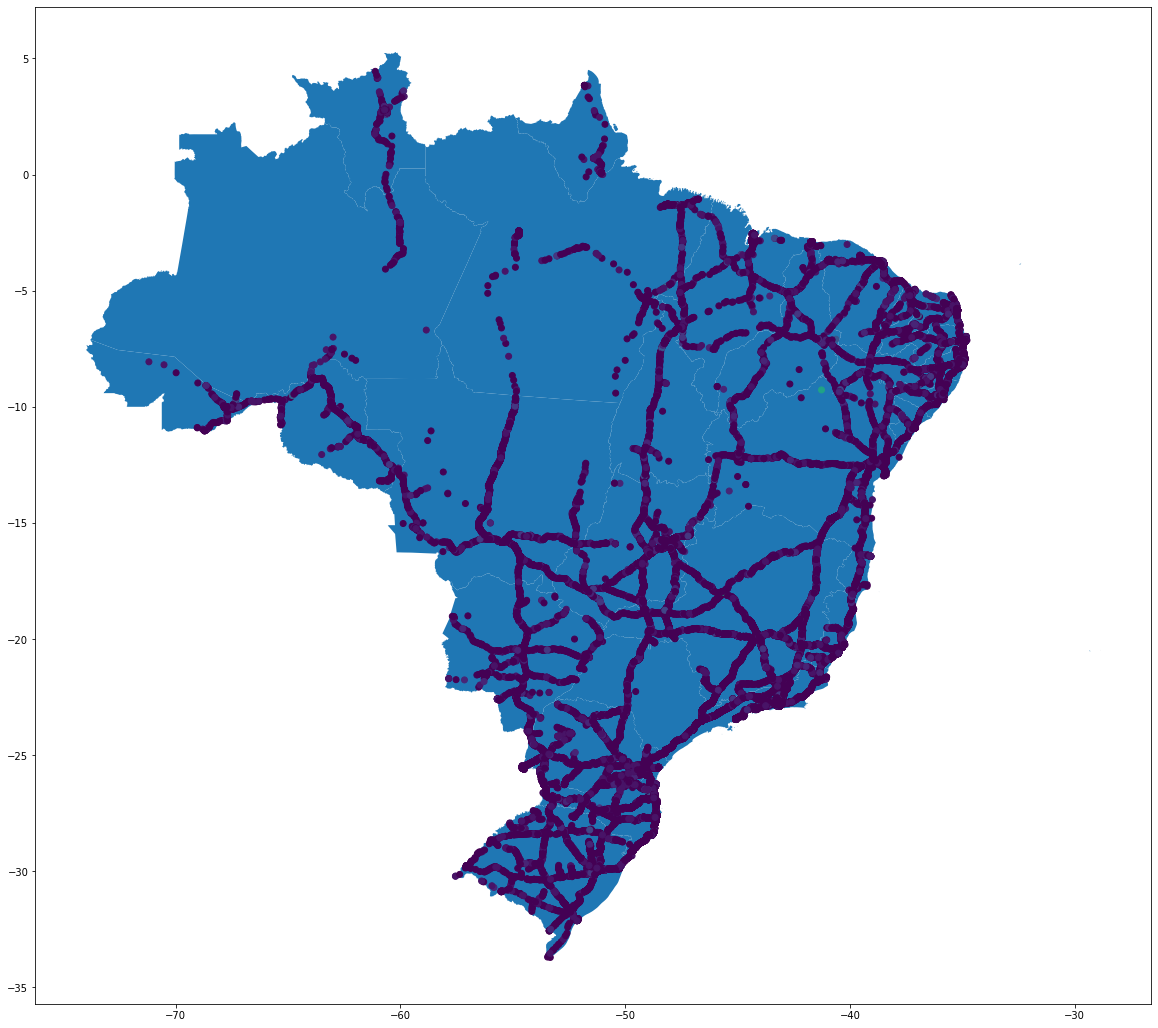

In [ ]:
#Para este mapa, será utilizado métodos do matplotlib como o subplots para combinar as duas camadas: limites territoriais e acidentes.
# Plotar Mapa Básico - Visualizar "feridos_graves"
fig, ax = plt.subplots(1, 1,figsize=(20,20))
Brasil.plot(ax = ax)
geo_BR_accidents_sample.plot(ax=ax, column='feridos_graves', figsize=(20,20))

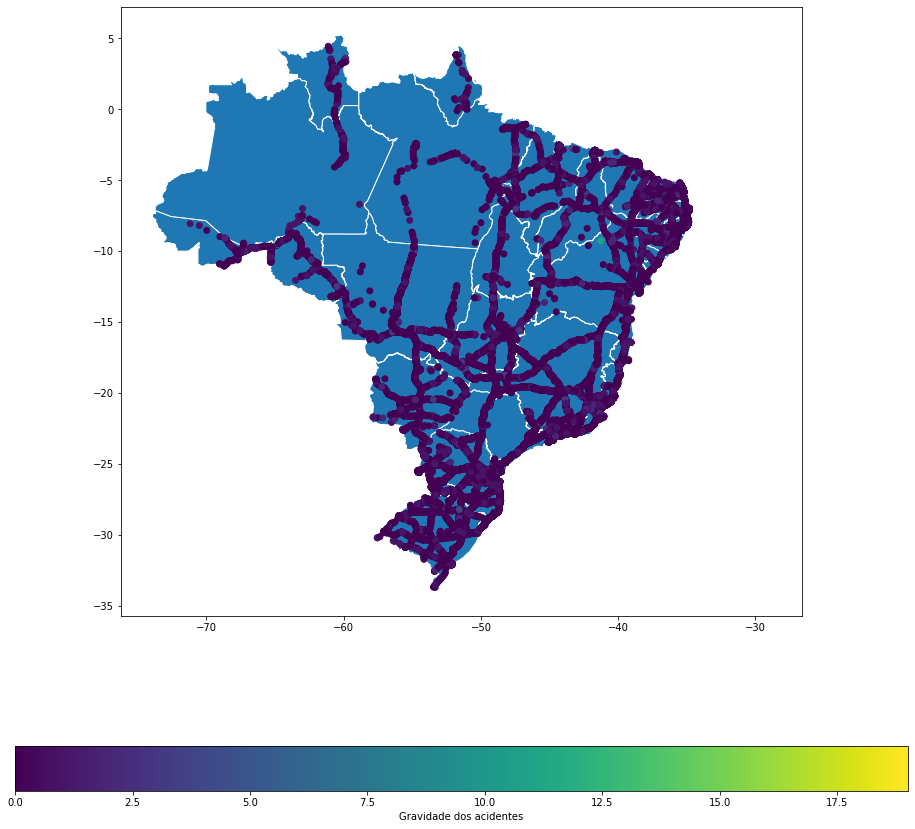

In [ ]:
### Plotar Mapa Básico - Visualizar "feridos_graves" ###
fig, ax = plt.subplots(1, 1, figsize=(16,16))
Brasil.plot(ax= ax, edgecolor='white')
geo_BR_accidents_sample.plot(ax= ax, figsize=(16,16), column='feridos_graves', legend=True, legend_kwds={'label': "Gravidade dos acidentes",
'orientation': "horizontal"})

Analise Exploratória de Mortos por Estado

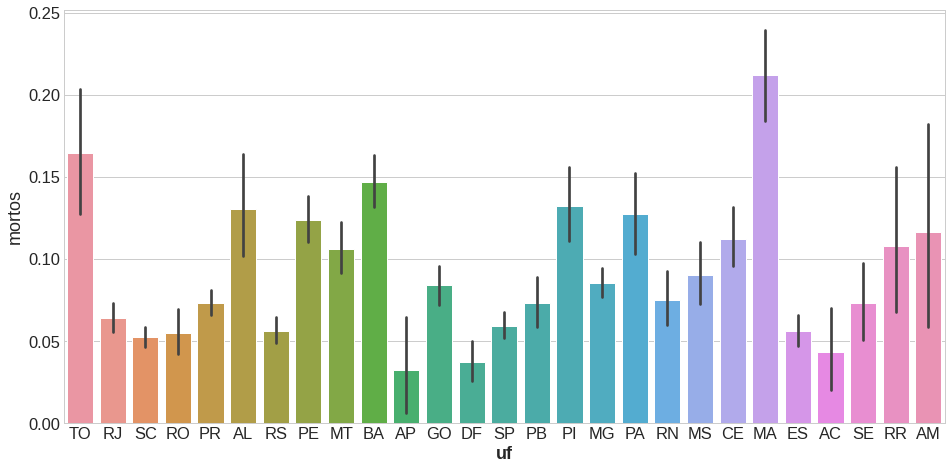

In [ ]:
import math
def barplots(dataframe, features, cols=2, width=10, height=10, hspace=0.5, wspace=0.25):
    # define style and layout
    sns.set(font_scale=1.5)
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataframe.shape[1]) / cols)
    # define subplots
    for i, column in enumerate(dataframe[features].columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        sns.barplot(data=dataframe, x = column, y = 'mortos')
        plt.xticks(rotation=0)
        plt.xlabel(column, weight='bold')

    
feature_list = ['uf']        
barplots(df, features=feature_list, cols=3, width=60, height=100, hspace=0.35, wspace=0.4)

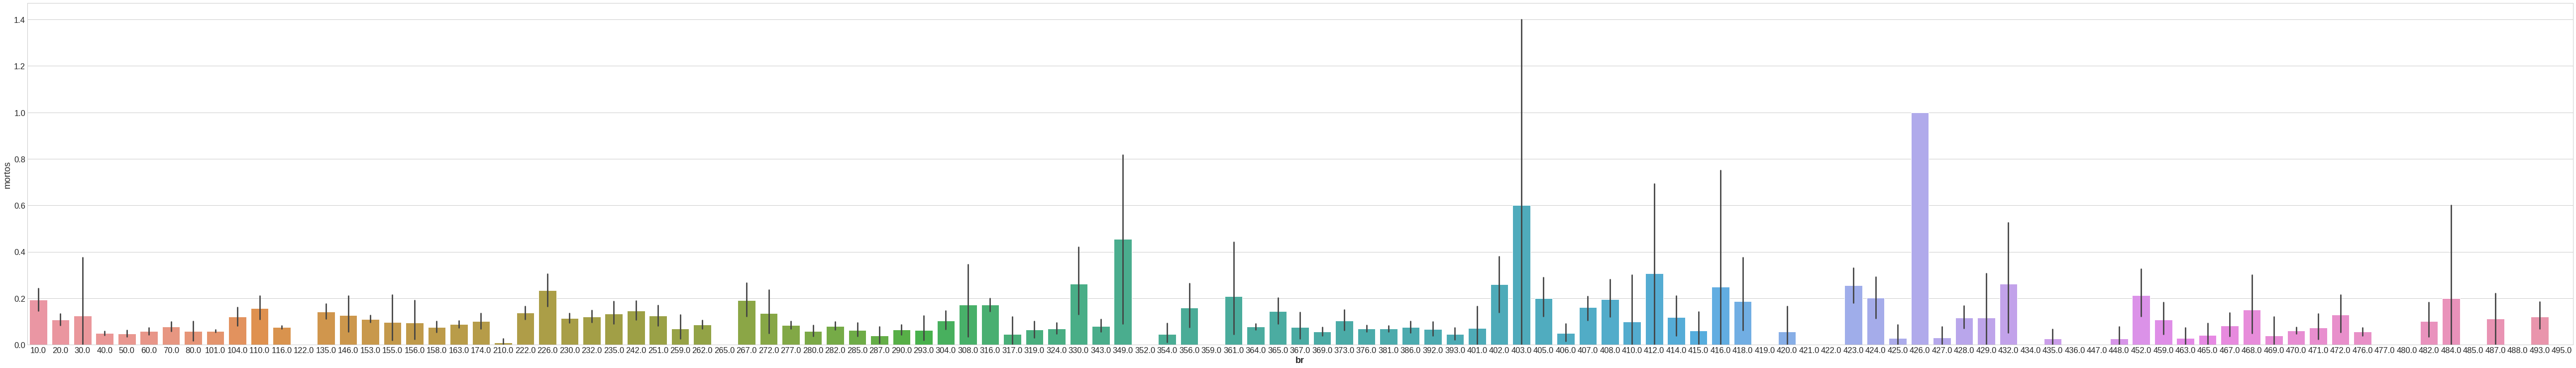

In [ ]:
import math
def barplots(dataframe, features, cols=2, width=10, height=10, hspace=0.5, wspace=0.25):
    # define style and layout
    sns.set(font_scale=1.5)
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataframe.shape[1]) / cols)
    # define subplots
    for i, column in enumerate(dataframe[features].columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        sns.barplot(data=dataframe, x = column, y = 'mortos')
        plt.xticks(rotation=0)
        plt.xlabel(column, weight='bold')

    
feature_list = ['br']        
barplots(df, features=feature_list, cols=2.5, width=220, height=200, hspace=0.35, wspace=0.4)

# **Prevendo risco de acidentes**

Filtrando dados de acidentes nos Estados

In [ ]:
rj = df
rj = rj[rj['uf']=='RJ']
rj.drop(['km', 'classificacao_acidente', 'sentido_via', 'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
        'latitude', 'longitude', 'regional',
       'delegacia', 'uop'], 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
rj.head()

,id,data_inversa,dia_semana,horario,uf,br,municipio,causa_acidente,tipo_acidente,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
1,260036.0,20200101.0,quarta-feira,10000.0,RJ,116.0,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,2,1,0,0,1,0,0,1
36,260080.0,20200101.0,quarta-feira,15000.0,RJ,116.0,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,Colisão lateral,6,0,1,1,2,2,2,2
39,260084.0,20200101.0,quarta-feira,34500.0,RJ,101.0,ANGRA DOS REIS,Condutor Dormindo,Colisão frontal,7,0,4,0,3,0,4,2
45,260092.0,20200101.0,quarta-feira,62500.0,RJ,101.0,ITABORAI,Falta de Atenção à Condução,Colisão traseira,2,0,1,0,1,0,1,2
50,260099.0,20200101.0,quarta-feira,72000.0,RJ,116.0,BELFORD ROXO,Ingestão de Álcool,Colisão com objeto estático,1,0,0,0,1,0,0,1


Usando Rio de Janeiro como exemplo, foi registrado 4222 acidentes ao longo do ano

In [ ]:
rj.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'municipio',
       'causa_acidente', 'tipo_acidente', 'pessoas', 'mortos', 'feridos_leves',
       'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos'],
      dtype='object')

Plotando a média de mortos nas brs do Estado do Rio de Janeiro

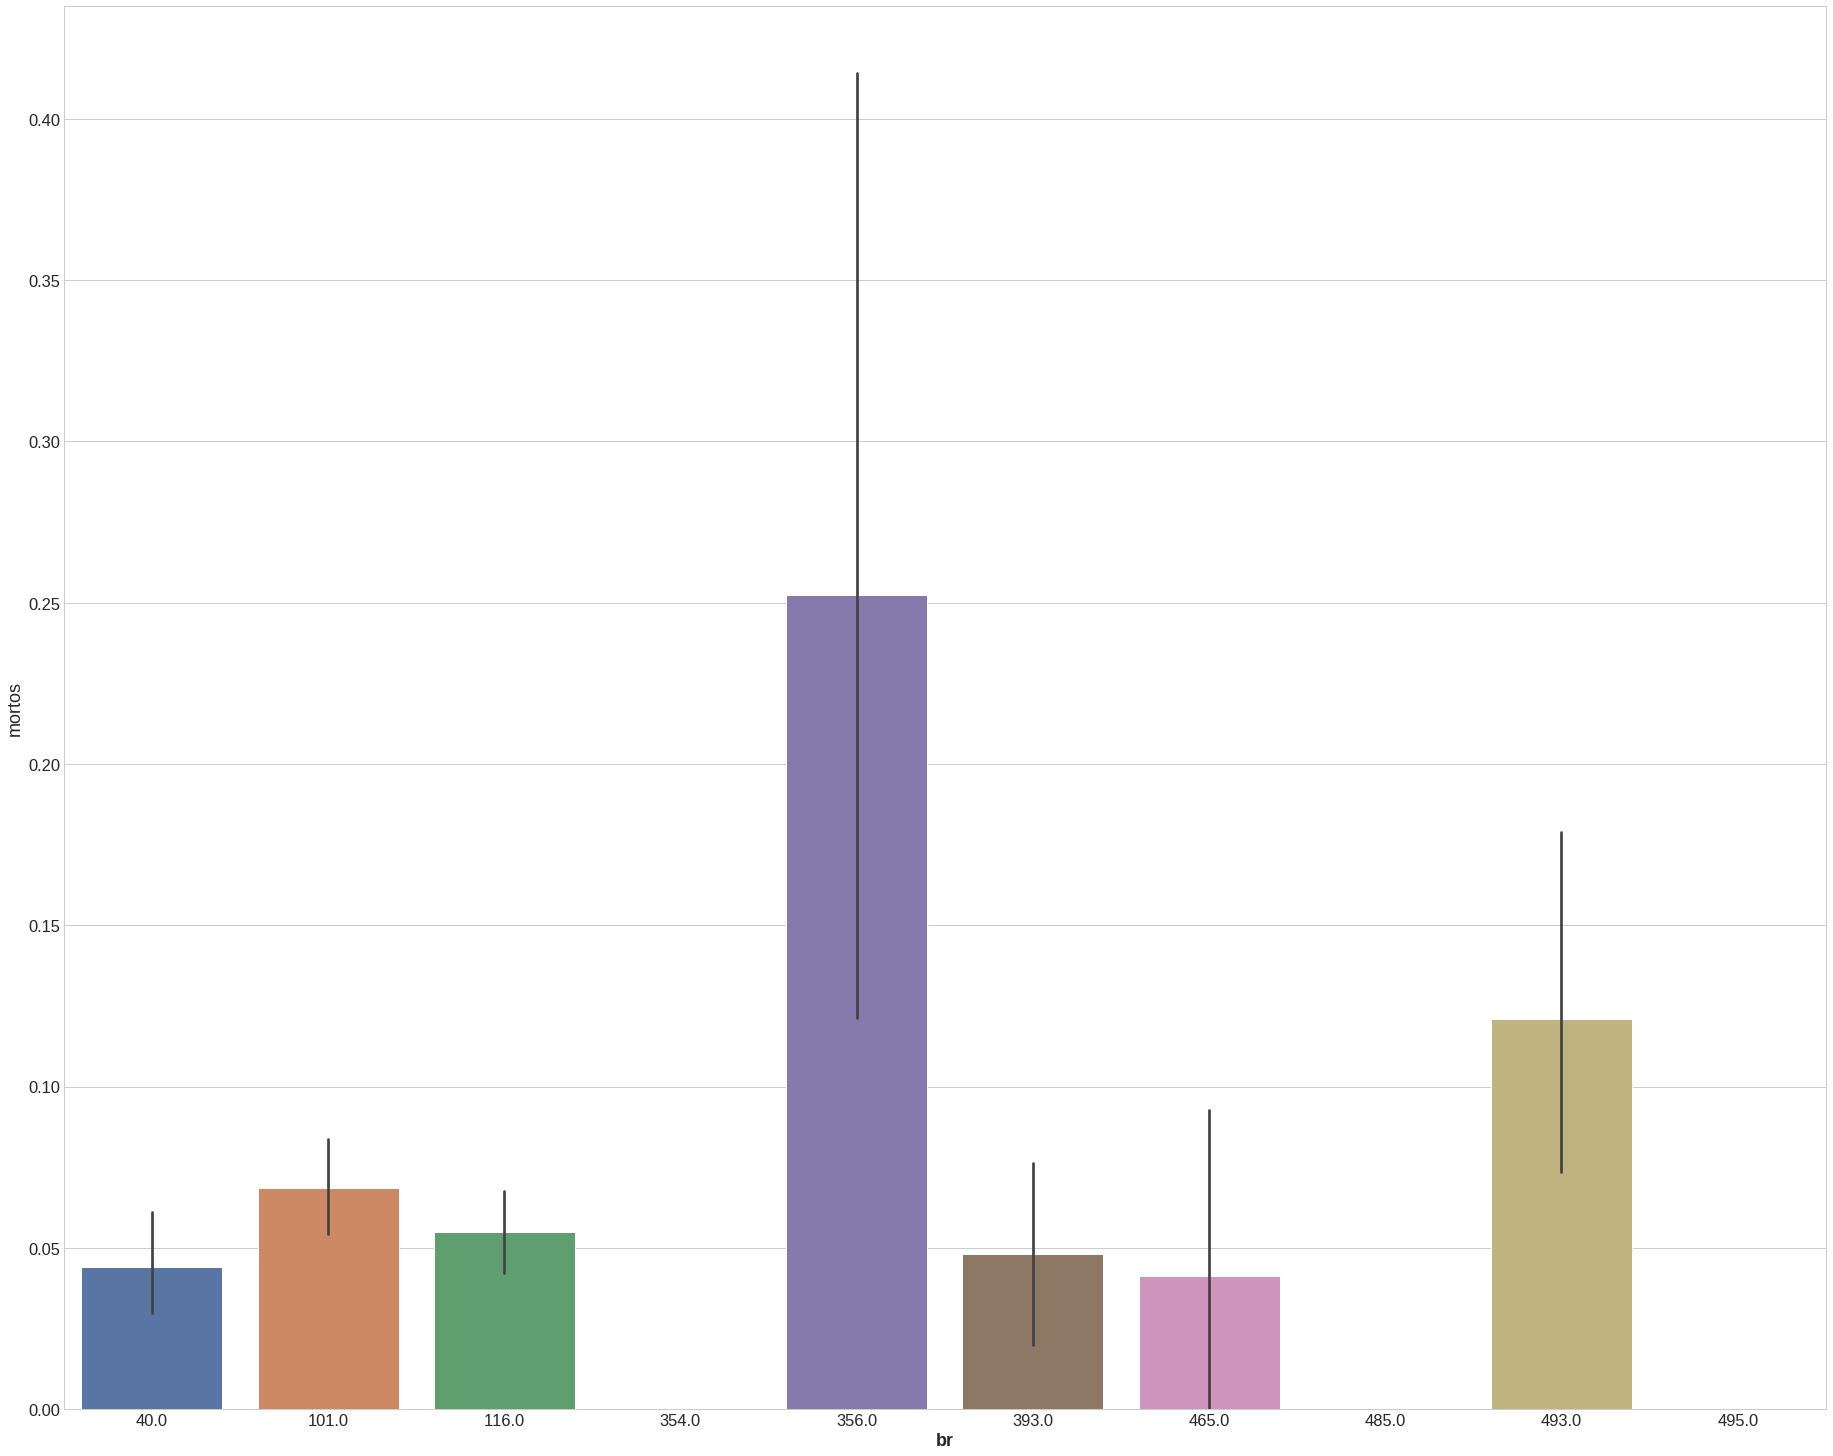

In [ ]:
import math
def barplots(dataframe, features, cols=2, width=10, height=10, hspace=0.5, wspace=0.25):
    # define style and layout
    sns.set(font_scale=1.5)
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataframe.shape[1]) / cols)
    # define subplots
    for i, column in enumerate(dataframe[features].columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        sns.barplot(data=dataframe, x = column, y = 'mortos')
        plt.xticks(rotation=0)
        plt.xlabel(column, weight='bold')

    
feature_list = ['br']        
barplots(rj, features=feature_list, cols=3, width=120, height=200, hspace=0.35, wspace=0.4)

In [ ]:
#Brs com maior numero de acidentes
rj.value_counts('br')

br
101.0    1513
116.0    1329
40.0      704
393.0     249
493.0     190
356.0      99
465.0      97
495.0      16
354.0       9
485.0       5
dtype: int64

# **Prevendo usando o KNN**

In [ ]:
rj.dtypes

id                float64
data_inversa       object
dia_semana         object
horario            object
uf                 object
br                float64
municipio          object
causa_acidente     object
tipo_acidente      object
pessoas             int64
mortos              int64
feridos_leves       int64
feridos_graves      int64
ilesos              int64
ignorados           int64
feridos             int64
veiculos            int64
dtype: object

In [ ]:
#Convertendo mais algus dados para float
rj['data_inversa'] = rj['data_inversa'].apply(lambda x: str(x).replace('-', ''))
rj['data_inversa'] = rj['data_inversa'].astype('float')

rj['horario'] = rj['horario'].apply(lambda x: str(x).replace(':', ''))
rj['horario'] = rj['horario'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
D_rj = rj

**Passando colunas categoricas em numericas**

In [ ]:
#Para tratar dados categorigos, será necessário a utilização da função pd.get_dummies()
#Depois disso dropar a coluna original e passar a convertida para a variável usando o metodo .concat()
rj = pd.get_dummies(D_rj['municipio'], prefix='Cidade')
D_rj = D_rj.drop(['municipio'], axis=1)

In [ ]:
D_rj = pd.concat([D_rj, rj], axis=1)

In [ ]:
#Para tratar dados categorigos, será necessário a utilização da função pd.get_dummies()
#Depois disso dropar a coluna original e passar a convertida para a variável usando o metodo .concat()
rj = pd.get_dummies(D_rj['causa_acidente'], prefix='Causa')
D_rj = D_rj.drop(['causa_acidente'], axis=1)

In [ ]:
D_rj = pd.concat([D_rj, rj], axis=1)

In [ ]:
#Para tratar dados categorigos, será necessário a utilização da função pd.get_dummies()
#Depois disso dropar a coluna original e passar a convertida para a variável usando o metodo .concat()
rj = pd.get_dummies(D_rj['tipo_acidente'], prefix='Tipo')
D_rj = D_rj.drop(['tipo_acidente'], axis=1)

In [ ]:
D_rj = pd.concat([D_rj, rj], axis=1)

In [ ]:
#Agora passando de forma manual as colunas Dia da Semana e UF, para numericos de forma mais organizada
DiaSemana = {'domingo': 1, 'segunda-feira': 2, 'terça-feira': 3, 'quarta-feira': 4, 'quinta-feira': 5, 'sexta-feira': 6, 'sabado': 7}
Estados = {'AC': 1, 'AL': 2, 'AP': 3, 'AM': 4, 'BA': 5, 'CE': 6, 'DF': 7, 'GO': 8, 'MG': 9, 'MS': 10, 'MT': 11, 'MA': 12, 'ES': 13,
           'PI': 14, 'PA': 15, 'PR': 16, 'SC': 17, 'RS': 18, 'RJ': 19, 'SP': 20, 'SE': 21, 'PE': 22, 'PB': 23, 'RN': 24, 'RO': 25, 'RR': 26, 'TO': 27}

In [ ]:
D_rj['dia_semana'] = D_rj['dia_semana'].map(DiaSemana) #adicionando coluna feita manualmente
D_rj['uf'] = D_rj['uf'].map(Estados)
D_rj['dia_semana'].fillna(0, inplace = True) #fillna para substituir valores nulos

In [ ]:
D_rj.head(100)

,id,data_inversa,dia_semana,horario,uf,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,Cidade_ANGRA DOS REIS,Cidade_AREAL,Cidade_BARRA DO PIRAI,Cidade_BARRA MANSA,Cidade_BELFORD ROXO,Cidade_CAMPOS DOS GOYTACAZES,Cidade_CARAPEBUS,Cidade_CARDOSO MOREIRA,Cidade_CASIMIRO DE ABREU,Cidade_COMENDADOR LEVY GASPARIAN,Cidade_CONCEICAO DE MACABU,Cidade_DUQUE DE CAXIAS,Cidade_GUAPIMIRIM,Cidade_ITABORAI,Cidade_ITAGUAI,Cidade_ITALVA,Cidade_ITAPERUNA,Cidade_ITATIAIA,Cidade_JAPERI,Cidade_MACAE,Cidade_MAGE,Cidade_MANGARATIBA,Cidade_MESQUITA,Cidade_NITEROI,Cidade_NOVA IGUACU,Cidade_PARACAMBI,Cidade_PARAIBA DO SUL,Cidade_PARATY,Cidade_PETROPOLIS,Cidade_PINHEIRAL,Cidade_PIRAI,Cidade_PORTO REAL,Cidade_QUEIMADOS,Cidade_QUISSAMA,Cidade_RESENDE,Cidade_RIO BONITO,Cidade_RIO DAS FLORES,Cidade_RIO DAS OSTRAS,Cidade_RIO DE JANEIRO,Cidade_SAO GONCALO,Cidade_SAO JOAO DA BARRA,Cidade_SAO JOAO DE MERITI,Cidade_SAO JOSE DO VALE DO RIO PRETO,Cidade_SAPUCAIA,Cidade_SEROPEDICA,Cidade_SILVA JARDIM,Cidade_TANGUA,Cidade_TERESOPOLIS,Cidade_TRES RIOS,Cidade_VASSOURAS,Cidade_VOLTA REDONDA,Causa_Acessar a via sem observar a presença dos outros veículos,Causa_Agressão Externa,Causa_Animais na Pista,Causa_Ausência de reação do condutor,Causa_Avarias e/ou desgaste excessivo no pneu,Causa_Carga excessiva e/ou mal acondicionada,Causa_Condutor Dormindo,Causa_Condutor deixou de manter distância do veículo da frente,Causa_Defeito Mecânico no Veículo,Causa_Defeito na Via,Causa_Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo,Causa_Desobediência às normas de trânsito pelo condutor,Causa_Desobediência às normas de trânsito pelo pedestre,Causa_Falta de Atenção do Pedestre,Causa_Falta de Atenção à Condução,Causa_Fenômenos da Natureza,Causa_Ingestão de Substâncias Psicoativas,Causa_Ingestão de Álcool,Causa_Ingestão de álcool e/ou substâncias psicoativas pelo pedestre,Causa_Mal Súbito,Causa_Não guardar distância de segurança,Causa_Objeto estático sobre o leito carroçável,Causa_Pista Escorregadia,Causa_Reação tardia ou ineficiente do condutor,Causa_Restrição de Visibilidade,Causa_Sinalização da via insuficiente ou inadequada,Causa_Ultrapassagem Indevida,Causa_Velocidade Incompatível,Tipo_Atropelamento de Animal,Tipo_Atropelamento de Pedestre,Tipo_Capotamento,Tipo_Colisão com objeto,Tipo_Colisão com objeto em movimento,Tipo_Colisão com objeto estático,Tipo_Colisão frontal,Tipo_Colisão lateral,Tipo_Colisão lateral sentido oposto,Tipo_Colisão transversal,Tipo_Colisão traseira,Tipo_Danos eventuais,Tipo_Derramamento de carga,Tipo_Engavetamento,Tipo_Incêndio,Tipo_Queda de ocupante de veículo,Tipo_Saída de leito carroçável,Tipo_Tombamento
1,260036.0,20200101.0,4.0,10000.0,19,116.0,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,260080.0,20200101.0,4.0,15000.0,19,116.0,6,0,1,1,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
39,260084.0,20200101.0,4.0,34500.0,19,101.0,7,0,4,0,3,0,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
45,260092.0,20200101.0,4.0,62500.0,19,101.0,2,0,1,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
50,260099.0,20200101.0,4.0,72000.0,19,116.0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
64,260118.0,20200101.0,4.0,93000.0,19,101.0,1,0

**Verificando valores nulos nas colunas**

In [ ]:
D_rj.isnull().sum()

id                                                                                       0
data_inversa                                                                             0
dia_semana                                                                               0
horario                                                                                  0
uf                                                                                       0
br                                                                                      11
pessoas                                                                                  0
mortos                                                                                   0
feridos_leves                                                                            0
feridos_graves                                                                           0
ilesos                                                                                   0

In [ ]:
#Dropando valores nulos
D_rj.dropna(subset=['br'], inplace=True)

# **Teste usando o KNN com Feridos Graves**

In [ ]:
# As features são basicamente todas as colunas, exceto feridos_graves
X = np.array(D_rj.drop(['feridos_graves'], 1)) #1 para dropar coluna

#coluna target é somente o feridos_graves
Y = np.array(D_rj['feridos_graves'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Separando o dataset em Treino e Teste, utilizando a função model_selection.train_test_split()

In [ ]:
from pandas.core.common import random_state
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2, random_state=0)
#test_size = 0.2, representa 20% do teste e random_state = 0, faz novos testes no modelo

Normalizando os valores para aumentar a probabilidade, usando a função StandardScaler()

In [ ]:
#Padroniza as features removendo a média e escala a variância a uma unidade. Isso significa que para cada feature, a média seria 0, 
# e o Desvio Padrão seria 1. Desta forma, as features são padronizadas, tornando-as mais manejáveis para os modelos
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Agora é chamar a função neighbors.KNeighborsClassifier() que está atribuida a uma variável clf

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors= 10, metric='euclidean')

Para treinar ele, será necessário a função .fit(), que vai receber as features de treiro e tambem o target de treino

In [ ]:
#Receber as features e targets de treino
clf.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

Com o modelo treinado, agora é utilizar ele em teste com os dados (X_test e Y_test), usando a função clf.score(), onde irá receber dois parametros, as features e targets de teste

In [ ]:
# features de teste (X_test) e target de teste (Y_test)
accuracy = clf.score(X_test, Y_test)
accuracy

0.8291814946619217

accuracy deu o resultado de 0.82 de confiabilidade em que um acidade é causado no Rio de Janeiro

Usando o KNN concluimos que 82% de chances reais de acontecer algum acidente nas estradas do Rio de Janeiro.